<a href="https://colab.research.google.com/github/TanayKumar76/DeepLearning_1BM22AD062/blob/main/DL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


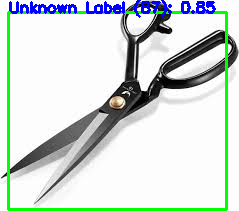

In [8]:
import torch
import torchvision
import cv2
import numpy as np
from torchvision.transforms import functional as F
from google.colab.patches import cv2_imshow

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

coco_cat_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                  'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
                  'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
                  'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
                  'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
                  'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                  'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
                  'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                  'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
                  'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
                  'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
                  'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


def detect_obj(path, threshold=0.5):
    img = cv2.imread(path)
    if img is None:
        print(f'Error: Could not load image from {path}. Please check the file path and ensure the image exists.')
        return None

    original_img = img.copy()
    img_tensor = F.to_tensor(img)
    with torch.no_grad():
        pred = model([img_tensor])

    boxes = pred[0]['boxes'].cpu().numpy()
    labels = pred[0]['labels'].cpu().numpy()
    scores = pred[0]['scores'].cpu().numpy()

    for i, box in enumerate(boxes):
        if scores[i] >= threshold:

            label_index = labels[i]
            if 0 <= label_index < len(coco_cat_names):
                label = coco_cat_names[label_index]
            else:
                label = f"Unknown Label ({label_index})"
                print(f"Warning: Encountered unknown label index: {label_index}")

            score = scores[i]

            start = (int(box[0]), int(box[1]))
            end = (int(box[2]), int(box[3]))
            cv2.rectangle(original_img, start, end, (0, 255, 0), 2)
            cv2.putText(original_img, f"{label}: {score:.2f}", start, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return original_img

if __name__ == '__main__':
    path = '/content/scissor.jpg'
    detected_image = detect_obj(path)

    if detected_image is not None:
        cv2_imshow(detected_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 42.1 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 309MB/s]



0: 576x640 1 scissors, 583.1ms
Speed: 15.7ms preprocess, 583.1ms inference, 28.5ms postprocess per image at shape (1, 3, 576, 640)


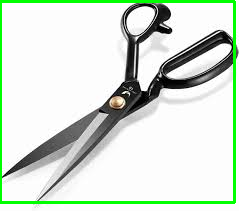

In [7]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

model = YOLO('yolov5s.pt')

def detect_objects_yolo(image_path, conf_threshold=0.5):

    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return

    results = model.predict(image, conf=conf_threshold)

    # Process results
    for result in results:
        boxes = result.boxes  # Detected boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0].item()  # Confidence score
            cls = int(box.cls[0].item())  # Class index
            label = result.names[cls]  # Class label

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


    cv2_imshow(image)

if __name__ == "__main__":
    input_image = "/content/scissor.jpg"
    detect_objects_yolo(input_image)